<a href="https://colab.research.google.com/github/chasuke2008/chatbot_app/blob/main/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%97%E6%B3%95%E5%A4%9A%E9%A0%85%E5%BC%8F%E8%BF%91%E4%BC%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

このプログラムは、コンピュータに数学の問題を解かせるためのものです。具体的には、実際のデータ点と数学的な関数の曲線がどれだけ一致しているかを計算して、グラフで表示します。このプログラムが何をしているかを簡単に説明します。

**1. ライブラリを読み込む**

>コンピュータが特定の仕事をするために必要なツールや命令が入った箱のようなものを「ライブラリ」といいます。このプログラムでは、計算やグラフを描くための命令が入った「numpy」、「matplotlib.pyplot」、「pandas」を使います。

**2. パラメータを設定する**

>パラメータとは、プログラムが使う基本的な情報のことです。このプログラムでは**N**という数字が100に設定されており、これはデータ点の数を意味します。**M**は後で使う曲線の複雑さを表す数字のリストです。

**3. データセットを作る関数**

>create_dataset関数は、実際のデータを作り出すための命令が書かれています。この関数はnum（データの数）を受け取り、その数だけxとyのペアを作り、それを表の形にして返します。**x**は0から1までの数字で、**y**は**x**に対応する数学的な関数（正弦関数np.sin）の値に少しのばらつき（ノイズ）を足したものです。

**4. 誤差を計算する関数**

>rms_error関数は、予測された曲線がどれだけ実際のデータと一致しているかを測るためのものです。これは、「ルート平均二乗誤差」という数学的な方法を使っています。データセットの各点について、予測された曲線の値と実際のyの値の違い（誤差）を計算し、それを平均して、数字が小さければ小さいほど良い予測とされます。

このプログラムの最初の部分では、データの作成や誤差の計算のための準備をしています。実際にグラフを描いたり、さまざまな曲線を試したりする作業は、この後のコードで行われます。プログラム全体を通じて、コンピュータは数学的な計算をしてくれて、私たちがデータのパターンを理解しやすくするためにグラフを描いてくれます。

In [ ]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

In [ ]:
#------------#
# Parameters #
#------------#
N=100
M=[0,1,3,9,21]

# Dataset {x_n,y_n} (n=1...N)
def create_dataset(num):

    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = pd.concat([dataset, pd.Series([x,y], index=['x','y']).to_frame().T], ignore_index=True)

        # dataset = dataset.append(Series([x,y], index=['x','y']),  ignore_index=True)
    return dataset

In [ ]:
# Root mean square error
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

このプログラムは、数学や科学でよく使われるデータのグラフを描くためのものです。プログラムがどのように機能するか、簡単な言葉で説明しましょう。

1. **ライブラリをインポートする**

>まず、計算やグラフ描画に必要なツールをプログラムに追加します。これらはnumpy（数値計算用）、pandas（データ管理用）、matplotlib.pyplot（グラフ描画用）というライブラリです。

2. **最小二乗法の関数を定義する**

>resolve関数は、データに一番よく合う曲線を見つけるために使います。数学でいうところの「一番近い」を計算する方法です。

3. **データセットを作成する**

>create_dataset(N)関数で、プログラムが使うデータを作ります。Nはデータの数です。

4. **グラフを準備する**

>fig = plt.figure(figsize=(12, 10)) この行は、描くグラフの大きさを決めています。

5. **グラフを描く**

>forループを使って、いくつかの異なる種類の曲線（多項式）をデータに合わせて描きます。Mは曲線の複雑さを表しており、数字が大きいほど複雑な曲線になります。
まず、訓練データ（青い点）を散布図として描きます。
次に、本当のグラフ（緑の線）を描きます。これはnp.sin(2 * np.pi * linex)で計算される正確な数学的な曲線です。
最後に、データに最も合うように計算された曲線（赤い線）を描きます。

6. **グラフのタイトルと軸を設定する**

>各グラフにはタイトルが付いており、"M=%d" % mの部分で、そのグラフがどの複雑さの曲線を描いているかを示しています。

7. **グラフを表示する**

>plt.show()はプログラムの最後にあり、これまでに準備したグラフを画面に表示します。

8. **誤差を計算する**

>プログラムの最後の部分では、各曲線がデータにどの程度合っているかを計算します。これはエラー（誤差）と呼ばれ、数字が小さいほどデータに合っています。
このプログラムで重要なのは、データに最も合う曲線を見つけることです。数学では、このような曲線を見つけることで、データの背後にあるパターンや規則性を理解することができます。科学実験や天気予報など、いろいろな場面でこの方法が使われます。

Table of the coefficients
           0         1          2             3             4
0   0.039053  0.554304   0.052403  1.541065e-01     -1.002990
1        NaN -1.030501  10.602726  2.271221e+02     41.346963
2        NaN       NaN -34.489960 -5.211768e+03   -886.238528
3        NaN       NaN  24.554315  4.743705e+04   6484.295552
4        NaN       NaN        NaN -2.243970e+05 -17850.705555
5        NaN       NaN        NaN  6.127115e+05   5627.056854
6        NaN       NaN        NaN -1.002356e+06  60197.746289
7        NaN       NaN        NaN  9.693392e+05 -97561.991991
8        NaN       NaN        NaN -5.106226e+05  24184.775471
9        NaN       NaN        NaN  1.128732e+05  34883.844688
10       NaN       NaN        NaN           NaN  -1277.769909
11       NaN       NaN        NaN           NaN -24003.565534
12       NaN       NaN        NaN           NaN   1049.163872
13       NaN       NaN        NaN           NaN  35215.144651
14       NaN       NaN        NaN           

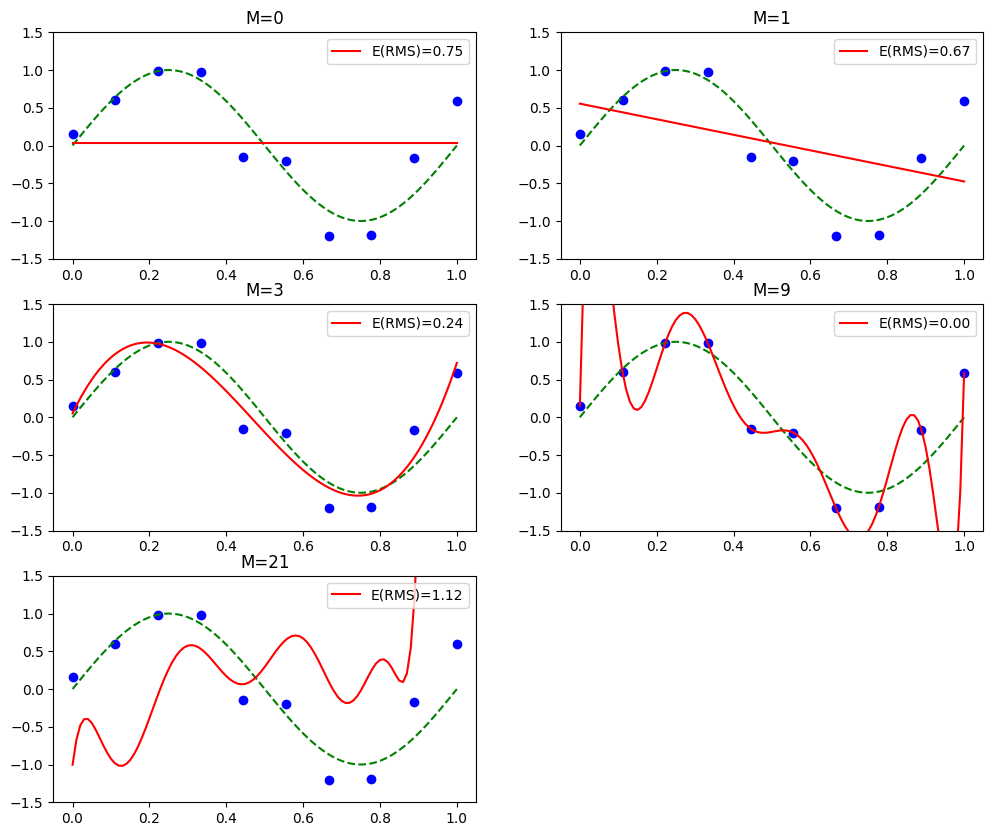

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Least-squares method
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return (f, ws)

if __name__ == '__main__':
    N = 10 #... You need to define N ...
    M = [0, 1, 3, 9, 21]  # Specify the degrees of the polynomial you want to use
    train_set = create_dataset(N)
    test_set = create_dataset(N)
    df_ws = pd.DataFrame()

    fig = plt.figure(figsize=(12, 10))  # You might need to adjust the figure size
    for c, m in enumerate(M):
        f, ws = resolve(train_set, m)
        ws_series = pd.Series(ws, name="M=%d" % m).to_frame().T
        df_ws = pd.concat([df_ws, ws_series], ignore_index=True)

        # Calculate number of rows required for 5 plots (in this case, we need 3 rows)
        rows = (len(M) + 1) // 2 if len(M) % 2 == 0 else (len(M) + 2) // 2
        cols = 2  # We can have 2 columns

        subplot = fig.add_subplot(rows, cols, c + 1)
        subplot.set_xlim(-0.05, 1.05)
        subplot.set_ylim(-1.5, 1.5)
        subplot.set_title("M=%d" % m)

        # Plot training set
        subplot.scatter(train_set.x, train_set.y, marker='o', color='blue')

        # Plot true graph
        linex = np.linspace(0, 1, 101)
        liney = np.sin(2 * np.pi * linex)
        subplot.plot(linex, liney, color='green', linestyle='--')

        # Plot approximate graph
        liney = f(linex)
        label = "E(RMS)=%.2f" % rms_error(train_set, f)
        subplot.plot(linex, liney, color='red', label=label)
        subplot.legend(loc=1)

    print("Table of the coefficients")
    print(df_ws.transpose())
    plt.show()  # Make sure to use plt.show() to display the figures

    df = pd.DataFrame(columns=['Training set', 'Test set'])
    for m in M:  # Iterate over the specified degrees
        f, ws = resolve(train_set, m)
        train_error = rms_error(train_set, f)
        test_error = rms_error(test_set, f)
        # You would need to add train_error and test_error to the DataFrame here


#上のグラフで過学習のもの、もしくは、オーバーフィッティングはどれですか。

In [ ]:
# # Least-squares method
# def resolve(dataset, m):
#     t = dataset.y
#     phi = DataFrame()
#     for i in range(0,m+1):
#         p = dataset.x**i
#         p.name="x**%d" % i
#         phi = pd.concat([phi,p], axis=1)
#     tmp = np.linalg.inv(np.dot(phi.T, phi))
#     ws = np.dot(np.dot(tmp, phi.T), t)

#     def f(x):
#         y = 0
#         for i, w in enumerate(ws):
#             y += w * (x ** i)
#         return y

#     return (f, ws)


# if __name__ == '__main__':
#     train_set = create_dataset(N)
#     test_set = create_dataset(N)
#     df_ws = DataFrame()

# fig = plt.figure()
# subplot_count = len(M)  # Mの要素の数に基づいてサブプロットの数を設定
# rows = (subplot_count + 1) // 2  # サブプロットの行数を計算
# for c, m in enumerate(M):
#     # pd.concatを使用してシリーズをDataFrameに追加
#     ws_series = pd.Series(ws, name="M=%d" % m).to_frame().T
#     df_ws = pd.concat([df_ws, ws_series], ignore_index=True)

#     # サブプロットの行数と列数を動的に指定
#     subplot = fig.add_subplot(rows, 2, c+1)
#     # fig = plt.figure()
#     # for c, m in enumerate(M):
#     #     f, ws = resolve(train_set, m)
#     #     df_ws = df_ws.append(Series(ws,name="M=%d" % m))

#     #     subplot = fig.add_subplot(3,2,c+1)
#     subplot.set_xlim(-0.05,1.05)
#     subplot.set_ylim(-1.5,1.5)
#     subplot.set_title("M=%d" % m)

#     # plot Training set
#     subplot.scatter(train_set.x, train_set.y, marker='o', color='blue')

#     # plot True graph
#     linex = np.linspace(0,1,101)
#     liney = np.sin(2*np.pi*linex)
#     subplot.plot(linex, liney, color='green', linestyle='--')

#     # plot Approximate graph
#     linex = np.linspace(0,1,101)
#     liney = f(linex)
#     label = "E(RMS)=%.2f" % rms_error(train_set, f)
#     subplot.plot(linex, liney, color='red', label=label)
#     subplot.legend(loc=1)

#     print ("Table of the coefficients")
#     print(df_ws.transpose())
#     fig.show()

#     df = DataFrame(columns=['Training set','Test set'])
#     for m in range(0,10):   # Dimension
#         f, ws = resolve(train_set, m)
#         train_error = rms_error(train_set, f)
#         test_error = rms_error(test_set, f)